In [64]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    %load_ext autoreload
%autoreload 2
import h5py
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import skimage.io
import skimage.measure
import skimage.morphology
import pandas as pd
from radiomics import featureextractor, getTestCase
import SimpleITK as sitk
import six
from Model.base.featuresExtractor import RadiomicsExtractor
from utils.core import Load_data
import pywt
from dotenv import load_dotenv
load_dotenv(override=True)

True

In [57]:
dataset_path = os.getenv("DATASET_DIR_HDf5")
data = h5py.File(dataset_path, "r")
dataset = pd.read_csv(os.getenv('DATASET_DIRR'), index_col="annot_id")

In [58]:
row = 13000
image = data["image"][row]
fram_num = data["frame_num"][row]
annot_id = data["annot_id"][row]
mask = data["mask"][row]

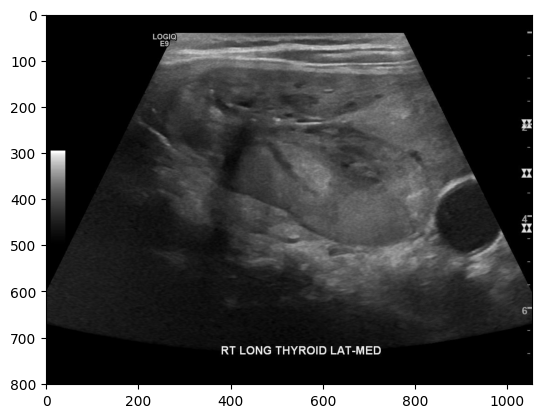

In [59]:
copy_iamge = image.copy()
copy_iamge[mask == 0] = 0
plt.imshow(image, cmap="gray")

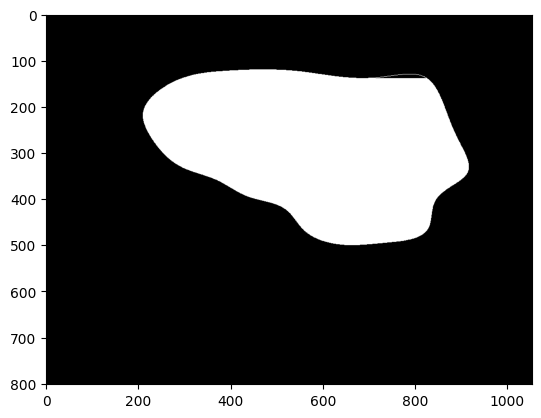

In [60]:
copy_iamge = image.copy()
copy_iamge[mask == 0] = 0
plt.imshow(mask, cmap="gray")

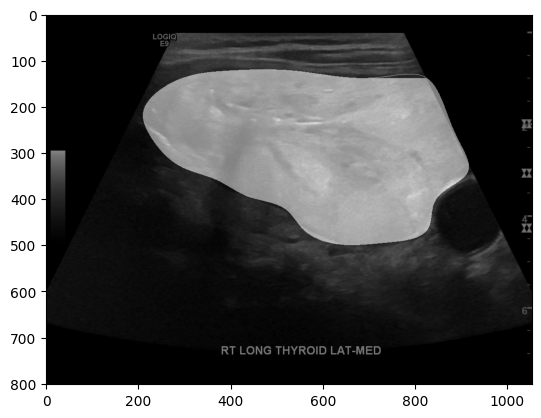

In [61]:

plt.imshow(image, cmap="gray")
plt.imshow(mask, cmap="gray", alpha=0.5)

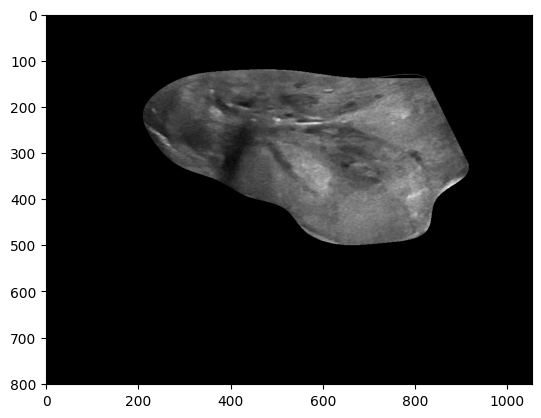

In [62]:
plt.imshow(copy_iamge, cmap="gray")

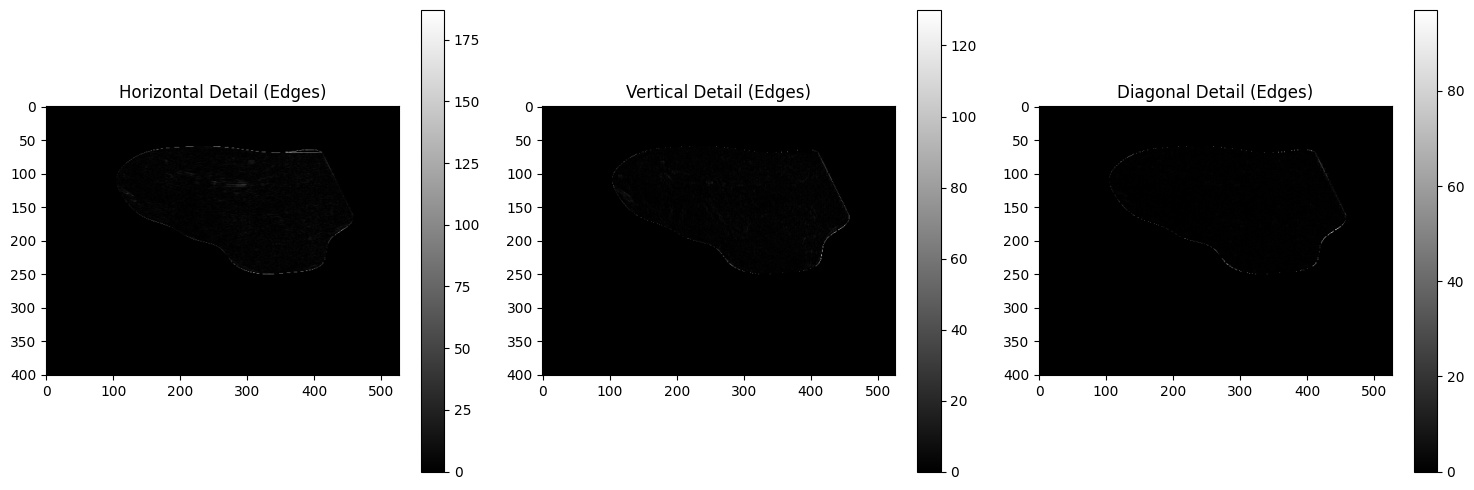

In [65]:
# Perform a 2D wavelet decomposition on the image
coeffs_photo = pywt.wavedec2(copy_iamge, 'db1', level=1)
cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo

# Plotting the detail coefficients (edges)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(cH_photo), cmap='gray')
plt.title("Horizontal Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.abs(cV_photo), cmap='gray')
plt.title("Vertical Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(cD_photo), cmap='gray')
plt.title("Diagonal Detail (Edges)")
plt.colorbar()
plt.tight_layout()
plt.show()